In [1]:
from one.api import ONE
one = ONE(base_url='https://alyx.internationalbrainlab.org')
import brainbox.io.one as bbone
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas
atlas = AllenAtlas(25)

In [2]:

# For testing
with open("bwm_eid.pkl",'rb') as f:
    ins = pickle.load(f)
    
# Setup the log spacing we'll use to save the ISI distribution
logbins = np.logspace(np.log10(0.001),np.log10(10),10)
logbins = np.insert(logbins,0,0)


In [3]:
ins

[['571d3ffe-54a5-473d-a265-5dc373eb7efc', 'probe00'],
 ['36280321-555b-446d-9b7d-c2e17991e090', 'probe00'],
 ['74bae29c-f614-4abe-8066-c4d83d7da143', 'probe01'],
 ['f304211a-81b1-446f-a435-25e589fe3a5a', 'probe00'],
 ['032452e9-1886-449d-9c13-0f192572e19f', 'probe00'],
 ['493170a6-fd94-4ee4-884f-cc018c17eeb9', 'probe00'],
 ['2d5f6d81-38c4-4bdc-ac3c-302ea4d5f46e', 'probe00'],
 ['f1db6257-85ef-4385-b415-2d078ec75df2', 'probe00'],
 ['d23a44ef-1402-4ed7-97f5-47e9a7a504d9', 'probe01'],
 ['f25642c6-27a5-4a97-9ea0-06652db79fbd', 'probe01'],
 ['dfbe628d-365b-461c-a07f-8b9911ba83aa', 'probe00'],
 ['86b6ba67-c1db-4333-add0-f8105ea6e363', 'probe01'],
 ['dfd8e7df-dc51-4589-b6ca-7baccfeb94b4', 'probe01'],
 ['5d6aa933-4b00-4e99-ae2d-5003657592e9', 'probe01'],
 ['c7bd79c9-c47e-4ea5-aea3-74dda991b48e', 'probe00'],
 ['032ffcdf-7692-40b3-b9ff-8def1fc18b2e', 'probe01'],
 ['875c1e5c-f7ec-45ac-ab82-ecfe7276a707', 'probe01'],
 ['5157810e-0fff-4bcf-b19d-32d4e39c7dfc', 'probe00'],
 ['510b1a50-825d-44ce-86f6-9

In [4]:
insertion = ins[0]
print(insertion)

['571d3ffe-54a5-473d-a265-5dc373eb7efc', 'probe00']


In [5]:
eid = insertion[0]
probe = insertion[1]


In [6]:
insertions = one.alyx.rest('insertions', 'list', session=eid)


In [7]:
insertions

[{'id': 'aecd7612-b5c5-4ad2-9e76-e5b783387e47',
  'session': '571d3ffe-54a5-473d-a265-5dc373eb7efc',
  'model': '3B2',
  'session_info': {'subject': 'KS045',
   'start_time': '2020-12-06T16:43:18.257000',
   'number': 2,
   'lab': 'cortexlab',
   'id': '571d3ffe-54a5-473d-a265-5dc373eb7efc',
   'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.4.2'},
  'name': 'probe00',
  'json': {'qc': 'PASS',
   'n_units': 243,
   'xyz_picks': [[985, -5274, -842],
    [985, -5274, -968],
    [936, -5274, -1068],
    [911, -5274, -1218],
    [911, -5274, -1367],
    [860, -5274, -1517],
    [835, -5274, -1693],
    [811, -5274, -1768],
    [786, -5274, -1893],
    [761, -5274, -2043],
    [736, -5274, -2168],
    [710, -5274, -2268],
    [686, -5274, -2418],
    [661, -5274, -2518],
    [611, -5300, -2618],
    [585, -5300, -2743],
    [536, -5300, -2817],
    [461, -5300, -2993],
    [410, -5324, -3143],
    [336, -5350, -3218],
    [285, -5350, -3368],
    [236, -5350, -3467],
    [211, -5350, -356

In [8]:
ssl = SpikeSortingLoader(pid='aecd7612-b5c5-4ad2-9e76-e5b783387e47', one=one)
spikes, clusters, channels = ssl.load_spike_sorting()


C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\spikes.amps.npy: 100%|█| 81
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\spikes.depths.npy: 100%|█| 
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\spikes.times.npy: 100%|█| 8
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\spikes.clusters.npy: 100%|█
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\clusters.depths.npy: 100%|█
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\probe00\pykilosort\clusters.channels.npy: 100%
C:\Users\Dan\Downloads\ONE\alyx.internationalbrainlab.org\cortexlab\Subjects\KS045\2020-12-06\002\alf\prob

In [9]:
spikes

{'amps': array([2.09832572e-04, 1.61915596e-04, 9.03947909e-05, ...,
        2.34010566e-04, 1.82344387e-04, 1.82304857e-04]),
 'depths': array([3331.41137695, 1319.09643555, 2854.72583008, ..., 2924.14477539,
        3084.92236328, 3032.81835938]),
 'times': array([1.22321855e-02, 1.57318571e-02, 1.76316788e-02, ...,
        4.08339352e+03, 4.08339466e+03, 4.08339532e+03]),
 'clusters': array([171,  65,  93, ..., 101, 127, 116], dtype=uint32)}

In [10]:
spikes.times

array([1.22321855e-02, 1.57318571e-02, 1.76316788e-02, ...,
       4.08339352e+03, 4.08339466e+03, 4.08339532e+03])

In [11]:
len(spikes.times)

10203086

In [12]:
spikes.clusters

array([171,  65,  93, ..., 101, 127, 116], dtype=uint32)

In [13]:
spikes.times[spikes.clusters==0]

array([2.86973071e-02, 5.36283010e-02, 7.53262649e-02, ...,
       4.08319405e+03, 4.08323342e+03, 4.08330022e+03])

In [14]:
import matplotlib.pyplot as plt

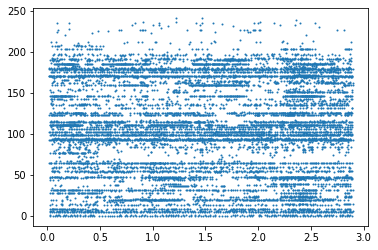

In [18]:
plt.plot(spikes.times[:10000],spikes.clusters[:10000],'o',markersize=1)

In [19]:
np.unique(spikes.clusters)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:
clu0_st = spikes.times[spikes.clusters==0]

In [25]:
clu0_isi = np.diff(clu0_st)

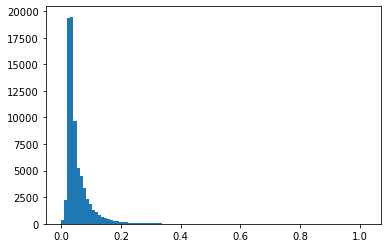

In [40]:
n,bins,patches = plt.hist(clu0_isi, bins=100)

In [41]:
n_perc = n / np.sum(n)

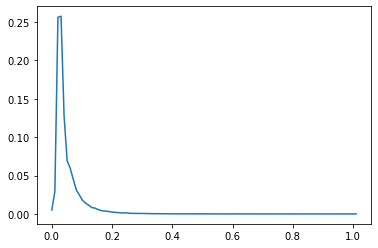

In [43]:
plt.plot(bins[:100],n_perc)

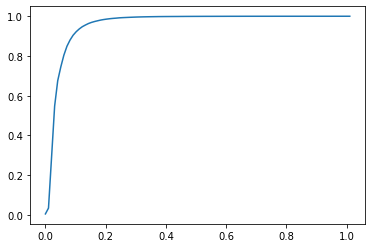

In [44]:
plt.plot(bins[:100],np.cumsum(n_perc))